## Rank aggregation methods for Network Meta-Analysis

In this notebook we will apply the Python module **rankagg**, used by the paper:

[insert citation]

to perform rank aggregation on NMA datasets. In particular, we will use the same data used by the paper, extracted from a study by Leicht et al.:

*Leucht S, Cipriani A, Spineli L, Mavridis D, Orey D, Richter F, Samara M, Barbui C, Engel RR, Geddes JR, Kissling W, Stapf MP, Lässig B, Salanti G, Davis JM. Comparative efficacy and tolerability of 15 antipsychotic drugs in schizophrenia: a multiple-treatments meta-analysis. Lancet. 2013 Sep 14;382(9896):951-62. doi: 10.1016/S0140-6736(13)60733-3. Epub 2013 Jun 27. Erratum in: Lancet. 2013 Sep 14;382(9896):940. PMID: 23810019.*

In [1]:
# loading the modules
import numpy as np
import pandas as pd
import os
import rankagg as ra

In [2]:
# loading the dataset
leicht_df = pd.read_csv(f"leicht_2013.csv")
outcomes = ['OE', 'WG', 'PL', 'QT', 'AD', 'EX', 'SD']
sucra_columns = [f"{oc}_sucra" for oc in outcomes]
d_columns = [f"{oc}_d" for oc in outcomes]
se_columns = [f"{oc}_se" for oc in outcomes]

# creating an output folder
leicht_folder = f"./results/"
if not os.path.exists(leicht_folder):
    os.makedirs(leicht_folder)

# setting the weights, assigning 50% to overall effect (OE)
weights = [6, 1, 1, 1, 1, 1, 1]

### Results

The following cells show the aggregated rankings (one method per cell)

In [3]:
borda_df = ra.bordaRanking(leicht_df, name_column='treatments', name_label='treatments',
                           list_columns=sucra_columns, weights=weights,
                           save_path=f"{leicht_folder}leicht_borda.csv")
print('BORDA RANKING')
display(borda_df)

BORDA RANKING


,treatments,agg_ranks,score
0,AMI,1,78.166667
1,OLA,2,75.833333
2,CLO,3,70.000000
3,PAL,4,69.416667
4,RIS,5,66.500000
5,ARI,6,64.750000
6,QUE,7,58.916667
7,HAL,8,53.666667
8,SER,9,45.500000
9,ZOT,10,40.833333


In [4]:
roid_df = ra.roidRanking(leicht_df, name_column='treatments', name_label='treatments',
                         list_columns=sucra_columns, weights=weights,
                         save_path=f"{leicht_folder}leicht_roid.csv")
print('GRAPH-BASED (ROID) RANKING')
display(roid_df)

GRAPH-BASED (ROID) RANKING


,treatments,agg_ranks,score
0,AMI,1,4.156250
1,CLO,2,3.903226
2,OLA,3,2.450980
3,PAL,4,1.854839
4,RIS,5,1.626866
5,ARI,6,1.514286
6,QUE,7,1.225000
7,HAL,8,0.977528
8,ZOT,9,0.876543
9,SER,10,0.708738


In [5]:
mc4_df = ra.mc4Ranking(leicht_df, name_column='treatments', name_label='treatments',
                       weights=weights, list_columns=sucra_columns,
                       save_path=f"{leicht_folder}leicht_mc4.csv")
print('MC4 RANKING')
display(mc4_df)

MC4 RANKING


,treatments,agg_ranks,score
0,CLO,1,0.976526
1,AMI,2,0.012381
2,OLA,3,0.004197
3,RIS,4,0.002112
4,PAL,5,0.001271
5,ZOT,6,0.000849
6,HAL,7,0.000608
7,QUE,8,0.000456
8,ARI,9,0.000355
9,SER,10,0.000284


In [6]:
mcnma_df = ra.mcNmaRanking(leicht_df, name_column='treatments', name_label='treatments',
                           d_columns=d_columns, se_columns=se_columns, weights=weights,
                           stay_param=0.5, save_path=f"{leicht_folder}leicht_mc-nma.csv")
print('MC-NMA RANKING')
display(mcnma_df)

MC-NMA RANKING


,treatments,agg_ranks,score
0,CLO,1,0.118748
1,AMI,2,0.103492
2,OLA,3,0.084339
3,PAL,4,0.073332
4,RIS,5,0.072508
5,ARI,6,0.069838
6,QUE,7,0.060411
7,HAL,8,0.055610
8,PBO,9,0.053792
9,ASE,10,0.048087


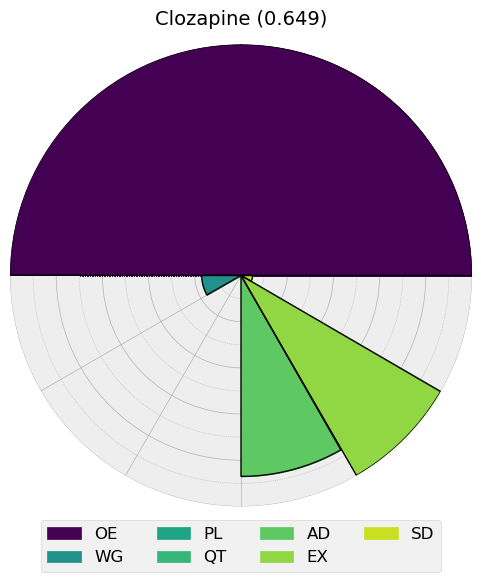

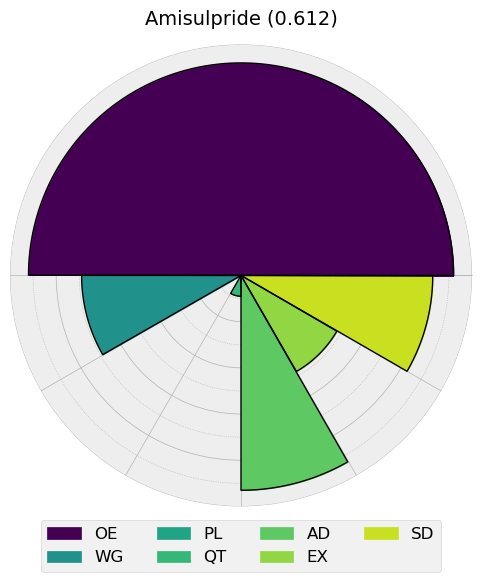

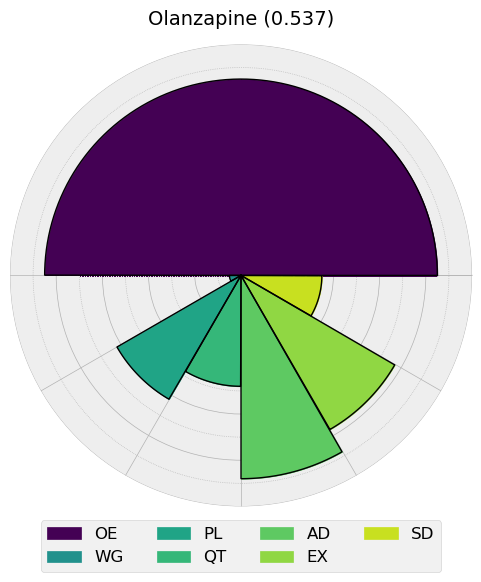

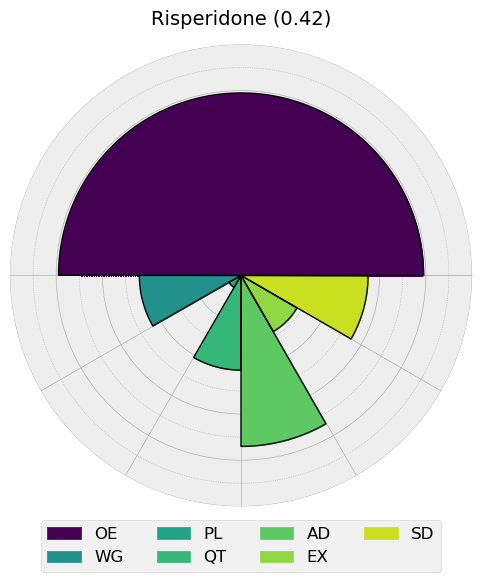

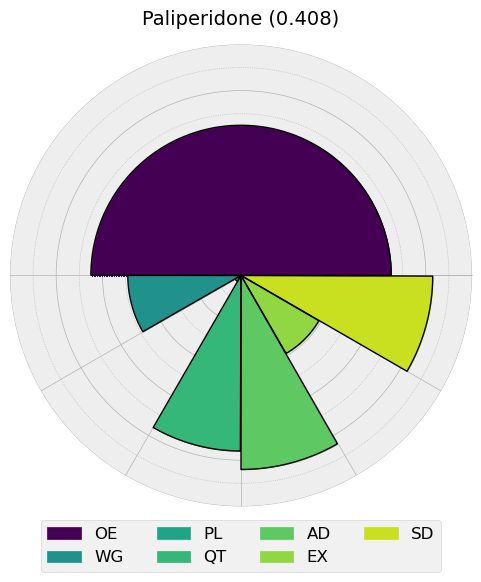

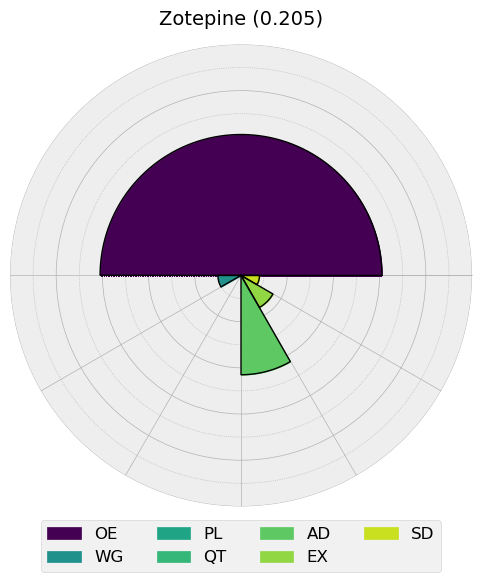

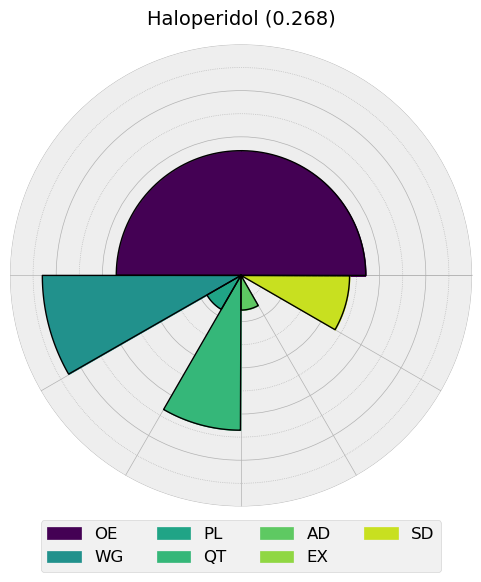

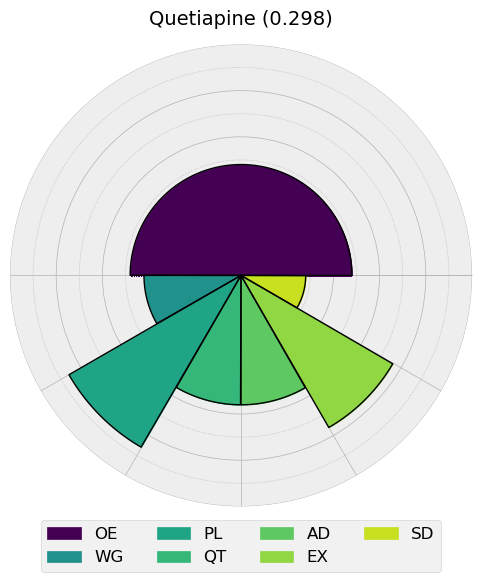

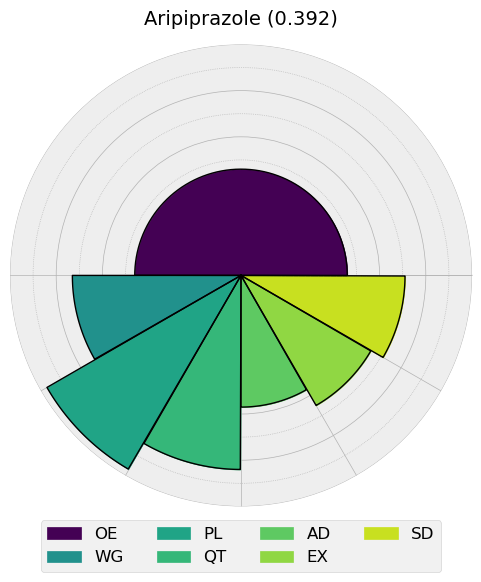

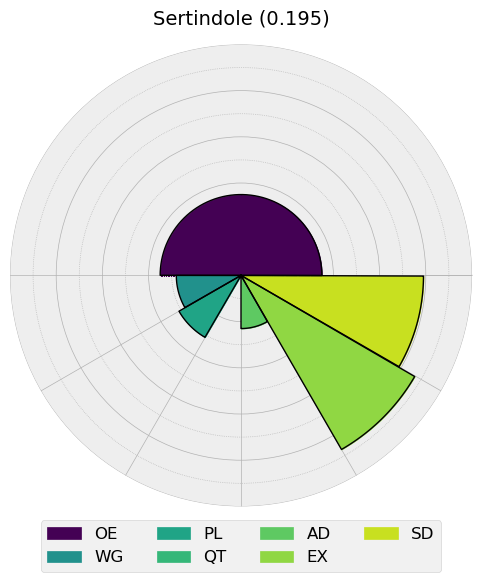

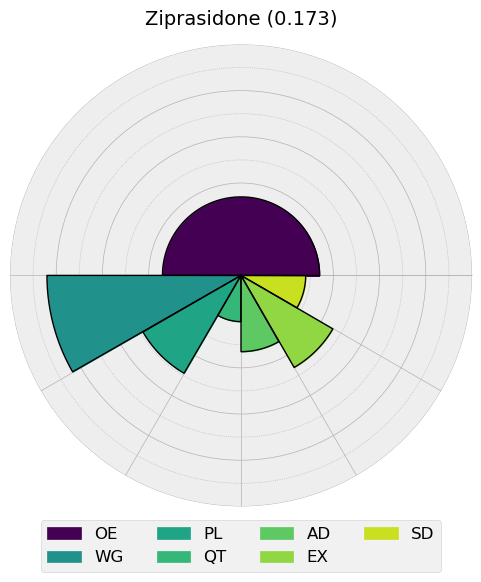

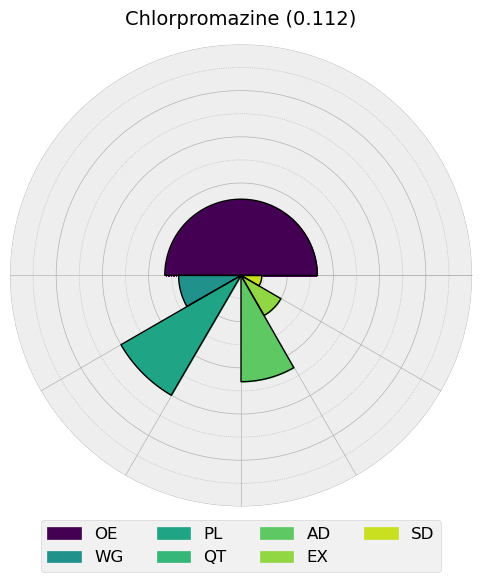

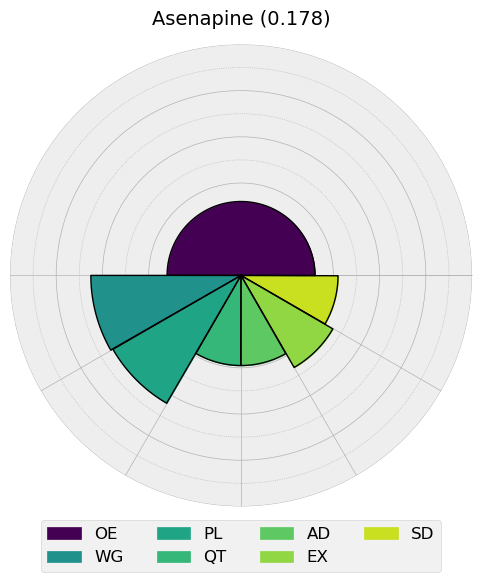

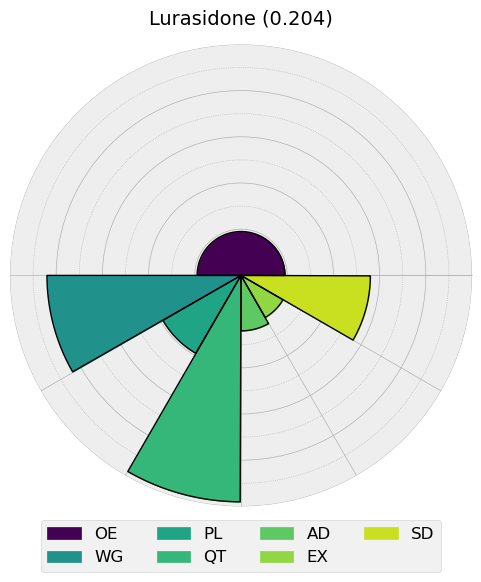

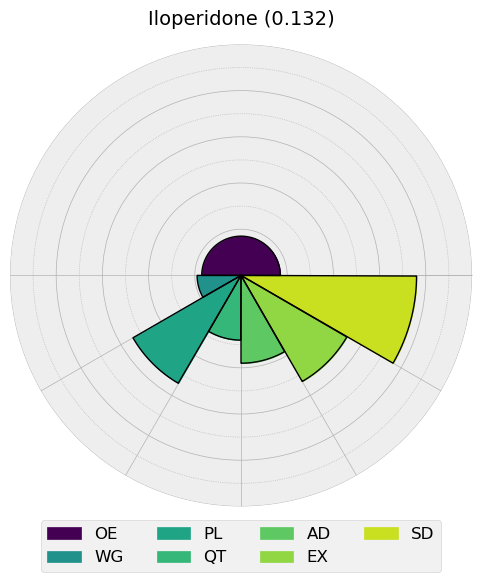

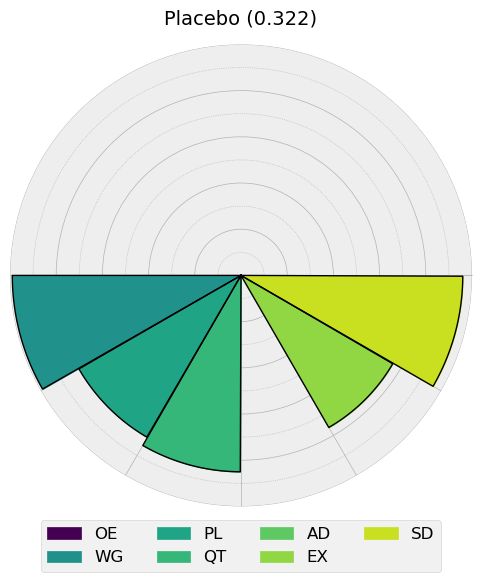

SPIE RANKING


,treatments,agg_ranks,score
0,CLO,1,0.649025
1,AMI,2,0.612233
2,OLA,3,0.536842
3,RIS,4,0.419867
4,PAL,5,0.408350
5,ARI,6,0.391708
6,PBO,7,0.321500
7,QUE,8,0.298467
8,HAL,9,0.267542
9,ZOT,10,0.204958


In [7]:
spie_df = ra.spieRanking(leicht_df, name_column='treatments', name_label='treatments',
                         list_columns=sucra_columns, list_names=outcomes, weights=weights,
                         plotname_column='full_name', show=True, cmap='viridis',
                         aggrank_save=f"{leicht_folder}leicht_spie.csv",
                         plotprefix_save=f"{leicht_folder}leicht_spie")
print('SPIE RANKING')
display(spie_df)

In [8]:
kendall_df = ra.kendallRanking(leicht_df, name_column='treatments', name_label='treatments',
                               list_columns=sucra_columns, weights=weights,
                               save_path=f"{leicht_folder}leicht_kendall.csv")
print('KENDALL RANKING')
display(kendall_df)

KENDALL RANKING


,treatments,agg_ranks,score
0,CLO,1,1.294554
1,AMI,2,1.300290
2,OLA,3,2.644382
3,RIS,4,2.676209
4,PAL,5,3.820095
5,ZOT,6,3.981341
6,HAL,7,6.611971
7,QUE,8,6.892011
8,ARI,9,8.706960
9,SER,10,9.601906


In [9]:
spearman_df = ra.spearmanRanking(leicht_df, name_column='treatments', name_label='treatments',
                                 list_columns=sucra_columns, weights=weights,
                                 save_path=f"{leicht_folder}leicht_spearman.csv")
print('SPEARMAN RANKING')
display(spearman_df)

SPEARMAN RANKING


,treatments,agg_ranks,score
0,OLA,1,1.091898
1,AMI,2,3.500502
2,CLO,3,3.869398
3,PAL,4,5.015792
4,RIS,5,6.502227
5,ARI,6,6.566915
6,QUE,7,9.736010
7,HAL,8,10.147926
8,SER,9,11.043074
9,ZOT,10,11.521540


In [10]:
bayes_df = ra.bayesianRanking(leicht_df, name_column='treatments', name_label='treatments',
                              list_columns=sucra_columns, bounded=True, upper_bound=1,
                              lower_bound=0, tau_max=10, niters=10000, burn_in=5000, chains=4,
                              bayesian_save=f"{leicht_folder}leicht_bayes-infer.csv",
                              aggrank_save=f"{leicht_folder}leicht_bayes-ranks.csv",
                              bayes_show=True, weights=weights)
print('BAYESIAN RANKING')
display(bayes_df)

Starting to sample (this will take a while, especially after the prog-bar)...


WARNING (theano.tensor.opt): Optimization Warning: The Op erfcx does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [PBO, ILO, LUR, ASE, CPZ, ZIP, SER, ARI, QUE, HAL, ZOT, PAL, RIS, OLA, AMI, CLO, tau]


Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 327 seconds.


Done!

Bayesian sampling is over! [tte = 54.0 mins]


,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
CLO,0.906,0.084,0.792,1.000,0.000,0.000,39732.0,21679.0,1.0
AMI,0.897,0.089,0.775,1.000,0.000,0.000,38333.0,22831.0,1.0
OLA,0.838,0.119,0.674,1.000,0.001,0.000,40542.0,20602.0,1.0
RIS,0.714,0.158,0.503,0.998,0.001,0.001,35074.0,16895.0,1.0
PAL,0.718,0.156,0.509,0.998,0.001,0.001,35516.0,16973.0,1.0
ZOT,0.379,0.183,0.057,0.657,0.001,0.001,38871.0,18256.0,1.0
HAL,0.419,0.175,0.120,0.707,0.001,0.001,30703.0,16029.0,1.0
QUE,0.560,0.174,0.264,0.844,0.001,0.001,39767.0,19755.0,1.0
ARI,0.716,0.156,0.505,0.995,0.001,0.001,37987.0,18009.0,1.0
SER,0.258,0.150,0.000,0.458,0.001,0.001,36799.0,16892.0,1.0


BAYESIAN RANKING


,treatments,agg_ranks,score
0,CLO,1,0.906
1,AMI,2,0.897
2,OLA,3,0.838
3,PAL,4,0.718
4,ARI,5,0.716
5,RIS,6,0.714
6,QUE,7,0.560
7,HAL,8,0.419
8,ZOT,9,0.379
9,ASE,10,0.300
